In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Data/airline_passengers.csv',
                 index_col='Month', 
                 parse_dates=True)

df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
print(df.index, '\n')
df.index.freq = 'MS'
print(df.index)

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None) 

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')


In [3]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA-12'] = df['Thousands of Passengers'].ewm(alpha=alpha, adjust=False).mean()
df.head()

,Thousands of Passengers,EWMA-12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [8]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])
fitted_model = model.fit(smoothing_level=alpha, optimized=False)
df['SES-12'] = fitted_model.fittedvalues.shift(-1)

df.head()

,Thousands of Passengers,EWMA-12,SES-12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


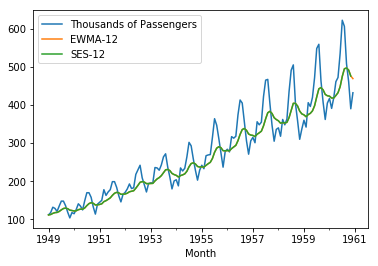

In [9]:
df.plot();

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA-12,SES-12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.336459
1949-02-01,118,112.923077,112.923077,120.336459
1949-03-01,132,115.857988,115.857988,134.336459
1949-04-01,129,117.879836,117.879836,131.336459
1949-05-01,121,118.359861,118.359861,123.336459


In [12]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES-12', 'DES_add_12'], dtype='object')

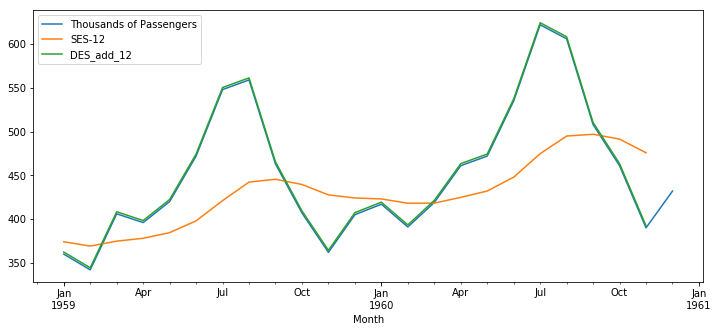

In [15]:
df[['Thousands of Passengers', 'SES-12', 'DES_add_12']].iloc[-24:].plot(figsize=(12, 5));

In [16]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

,Thousands of Passengers,EWMA-12,SES-12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.336459,112.049247
1949-02-01,118,112.923077,112.923077,120.336459,118.051885
1949-03-01,132,115.857988,115.857988,134.336459,132.058041
1949-04-01,129,117.879836,117.879836,131.336459,129.056722
1949-05-01,121,118.359861,118.359861,123.336459,121.053204


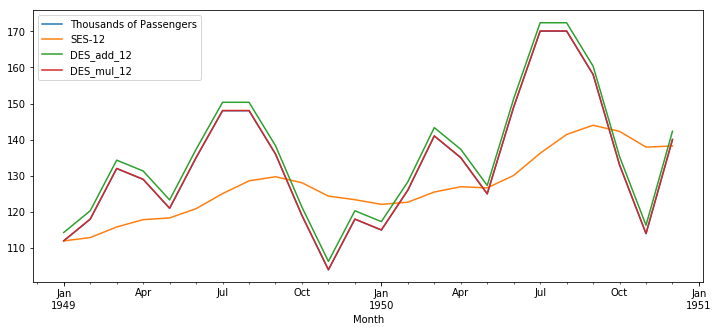

In [18]:
df[['Thousands of Passengers', 'SES-12', 'DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize=(12, 5));

In [20]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], 
                                        trend='mul', 
                                        seasonal='mul',
                                        seasonal_periods=12).fit().fittedvalues
df.head()

,Thousands of Passengers,EWMA-12,SES-12,DES_add_12,DES_mul_12,TES_mul_12
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.336459,112.049247,111.583338
1949-02-01,118,112.923077,112.923077,120.336459,118.051885,118.835364
1949-03-01,132,115.857988,115.857988,134.336459,132.058041,133.352623
1949-04-01,129,117.879836,117.879836,131.336459,129.056722,127.901871
1949-05-01,121,118.359861,118.359861,123.336459,121.053204,120.989261


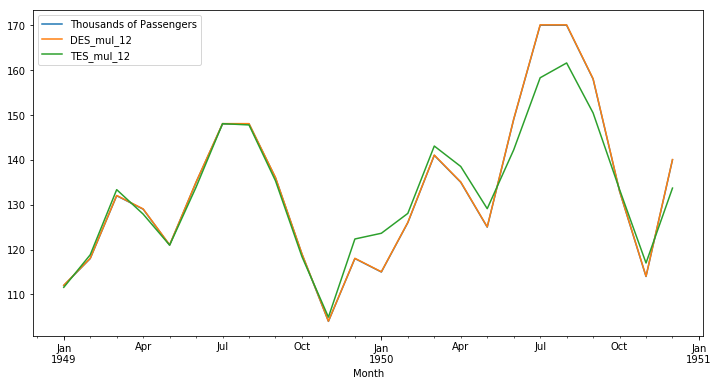

In [24]:
df[['Thousands of Passengers', 'DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(12, 6));

In [22]:
df.columns

Index(['Thousands of Passengers', 'EWMA-12', 'SES-12', 'DES_add_12',
       'DES_mul_12', 'TES_mul_12'],
      dtype='object')